# Разведочный анализ данных

*Датасет*: **task_for_a_prod_analytics_trainee_part_c.csv**
 
*Выполнил*: **Шишков Алексей Алексеевич, ВШЭ, ФКН, ПМИ, 2 курс**

## Загрузка данных, первичная обработка

Сначала подключим нужные библиотеки и сделаем так, чтобы все колонки таблицы не скрывались. 

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

Посмотрим на данные, которые находятся в табличке.

In [2]:
df = pd.read_csv("task_for_a_prod_analytics_trainee_part_c.csv")
df = df.drop("hashed_user_id", axis=1)
df.head()

,user_age,user_sex,user_friends,user_communities_count,user_fans_count,user_subscriptions_count,device_brand,device_model,days_in_vk_1_week,days_in_vk_2_weeks,days_in_vk_4_weeks,days_in_vk_8_weeks,messaging_total,calls_accepted,timespent_total,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story
0,26,male,481,476,361,177,lge,LG-M250,7,14,28,56,1,0,501,0,55,0,0,0,0,0
1,26,female,115,72,419,0,Apple,iPhone 7,7,14,28,56,23,0,0,0,0,0,0,0,0,0
2,26,female,297,317,2681,0,Apple,iPhone 11 Pro Max,7,14,28,56,33,0,0,0,0,0,0,0,0,0
3,20,male,147,130,216,0,samsung,SM-G970F,7,14,28,56,1,0,5085,101,2371,0,0,0,0,0
4,39,male,138,311,51,33,NaN,NaN,7,14,28,56,3,0,1301,0,0,0,0,0,0,0


Вот такие есть колонки. К сожалению, описание данных в задании не полностью покрывает эти названия, но по ним можно понять, за что они отвечают.


In [3]:
df.columns

Index(['user_age', 'user_sex', 'user_friends', 'user_communities_count',
       'user_fans_count', 'user_subscriptions_count', 'device_brand',
       'device_model', 'days_in_vk_1_week', 'days_in_vk_2_weeks',
       'days_in_vk_4_weeks', 'days_in_vk_8_weeks', 'messaging_total',
       'calls_accepted', 'timespent_total', 'timespent_im', 'timespent_feed',
       'timespent_photo', 'timespent_video', 'timespent_clips',
       'timespent_audio', 'timespent_story'],
      dtype='object')

Тут найдём, есть ли в данных пропуски.

In [4]:
df.isna().sum()

user_age                        0
user_sex                        0
user_friends                    0
user_communities_count          0
user_fans_count                 0
user_subscriptions_count        0
device_brand                18844
device_model                19145
days_in_vk_1_week               0
days_in_vk_2_weeks              0
days_in_vk_4_weeks              0
days_in_vk_8_weeks              0
messaging_total                 0
calls_accepted                  0
timespent_total                 0
timespent_im                    0
timespent_feed                  0
timespent_photo                 0
timespent_video                 0
timespent_clips                 0
timespent_audio                 0
timespent_story                 0
dtype: int64

Вроде как пропуски есть только в моделях телефонов. Но кроме этого у нас есть ещё текстовые переменные (пол). Какие у них есть значения?

In [5]:
df["user_sex"].value_counts()

male       80468
female     45348
unknown       77
Name: user_sex, dtype: int64

О! Ещё 77 пропущенных значений. Хорошо, что мы их обнаружили. Но их не так много, так что можно отнести их к женщинам.

Посмотрим, какими девайсами пользуются аудитория.

In [6]:
print(df["device_brand"].isna().sum())

df["device_brand"].value_counts().head(10)

18844


Apple      40272
samsung    18133
HONOR      11814
xiaomi      7478
Xiaomi      6804
Redmi       6466
HUAWEI      5549
realme      1085
POCO         920
asus         732
Name: device_brand, dtype: int64

К тому же не стоит забывать про тех, для кого этот параметр неопределён. Возможно, это должно быть связано с тем, что человек сидит ВКонтакте только с компьютера, поэтому назовём эту группу условно так (хотя это может быть связано и с тем, что устройство просто не смогло определиться приложением).

Заменим категориальные переменные на dummy-параметры.

In [7]:
df["device_brand"] = df["device_brand"].str.lower()
popular_brands = set(df["device_brand"].value_counts().head(5).index)
df["is_pc"] = df["device_brand"].isna().astype(int)
for name in popular_brands:
    df["is_" + name] = (df["device_brand"] == name).astype(int)
popular_brands_dummies = [name for name in popular_brands] + [np.nan]
df["is_not_pop_device"] = (~df["device_brand"].isin(popular_brands_dummies)).astype(int)

Удалим все текстовые переменные и положим очищенный датасет в новую переменную.

In [8]:
df["is_male"] = (df["user_sex"] == "male").astype(int)
df_no_text = df.drop(["user_sex",  "device_brand", "device_model"], axis=1)
display(df_no_text.head(20))
display(df_no_text.shape)


,user_age,user_friends,user_communities_count,user_fans_count,user_subscriptions_count,days_in_vk_1_week,days_in_vk_2_weeks,days_in_vk_4_weeks,days_in_vk_8_weeks,messaging_total,calls_accepted,timespent_total,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story,is_pc,is_xiaomi,is_samsung,is_honor,is_apple,is_redmi,is_not_pop_device,is_male
0,26,481,476,361,177,7,14,28,56,1,0,501,0,55,0,0,0,0,0,0,0,0,0,0,0,1,1
1,26,115,72,419,0,7,14,28,56,23,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,26,297,317,2681,0,7,14,28,56,33,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,20,147,130,216,0,7,14,28,56,1,0,5085,101,2371,0,0,0,0,0,0,0,1,0,0,0,0,1
4,39,138,311,51,33,7,14,28,56,3,0,1301,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,25,65,20,269,1,7,14,28,52,1,0,3731,0,452,303,0,0,0,0,0,0,0,1,0,0,0,0
6,25,41,236,22,35,7,13,24,48,1,0,11042,4,2543,13,7470,0,0,0,0,0,1,0,0,0,0,1
7,60,7,18,0,1,7,13,23,42,0,0,6920,0,2218,311,25,0,0,0,0,0,0,0,0,1,0,1
8,29,103,291,230,0,7,14,28,56,1,0,4428,0,1096,191,0,0,258,0,1,0,0,0,0,0,0,0
9,30,196,160,70,11,7,14,28,56,0,0,2997,0,727,282,1005,0,0,4,0,0,1,0,0,0,0,1


(125893, 27)

---

## Кластеризация

Кластеризовать будем методом ближайших соседей. 

Отнормализуем признаки, чтобы метод одинакого опирался на все признаки.

In [9]:
from sklearn.preprocessing import StandardScaler

X = df_no_text.values

X = StandardScaler().fit_transform(X)
X

array([[-0.41253319,  0.45508706,  0.63022698, ..., -0.23268404,
         2.614759  ,  0.75133888],
       [-0.41253319, -0.19049484, -0.41434183, ..., -0.23268404,
        -0.38244442, -1.33095734],
       [-0.41253319,  0.13053222,  0.21912193, ..., -0.23268404,
        -0.38244442, -1.33095734],
       ...,
       [-1.68049044, -0.08113397,  2.48407807, ..., -0.23268404,
         2.614759  , -1.33095734],
       [ 0.56281854, -0.16756434,  0.08208691, ..., -0.23268404,
         2.614759  , -1.33095734],
       [-0.41253319, -0.32631399,  0.41303941, ..., -0.23268404,
         2.614759  ,  0.75133888]])

Запускаем кластеризацию. Число кластеров выберем равным 5, чтобы легко было с одной стороны просмотреть параметры каждого кластера, а с другой --- найти как можно больше интересных особенностей. Фиксируем $\texttt{random}\_\texttt{state}$, чтобы получать одинаковые результаты в случае перезапуска.

In [10]:
from sklearn.cluster import *

kmeans = KMeans(n_clusters=5, random_state=41).fit(X)

Загоним номер кластера в табличку. Посчитаем, сколько объектов каждого класса получилось.

In [11]:
df["cluster"] = kmeans.labels_
df["cluster"].value_counts()

2    61990
3    38843
1    15382
4     8585
0     1093
Name: cluster, dtype: int64

Посчитаем средние значения фичей по каждому кластеру.

In [12]:
df.groupby("cluster").mean()

,user_age,user_friends,user_communities_count,user_fans_count,user_subscriptions_count,days_in_vk_1_week,days_in_vk_2_weeks,days_in_vk_4_weeks,days_in_vk_8_weeks,messaging_total,calls_accepted,timespent_total,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story,is_pc,is_xiaomi,is_samsung,is_honor,is_apple,is_redmi,is_not_pop_device,is_male
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,38.768527,4750.726441,1066.254346,2519.150046,1606.181153,6.737420,13.410796,26.847210,53.515096,266.891125,0.019213,6770.688930,609.723696,904.949680,204.967978,356.399817,2.850869,81.356816,11.171089,0.261665,0.102470,0.125343,0.072278,0.264410,0.052150,0.121683,0.810613
1,36.975751,177.049798,260.249512,141.253348,28.309843,6.780328,13.469965,26.774152,53.106943,29.943765,0.006436,4150.721363,92.887921,192.147250,33.294890,48.001170,0.757314,8.457353,1.325965,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.654206
2,35.833054,176.669221,237.974770,152.852331,25.743394,6.884014,13.717503,27.303791,54.170253,49.398403,0.030682,6844.057138,1210.812405,2085.118551,385.425940,547.616874,6.486288,111.401049,14.792434,0.002355,0.216599,0.269689,0.176061,0.001436,0.097806,0.236054,0.651718
3,29.360477,214.948948,210.168653,240.352959,17.294442,6.930670,13.837114,27.628221,55.106531,72.929872,0.041912,982.521304,8.935201,9.543367,2.109106,3.119867,0.033417,0.747728,0.064104,0.000000,0.000000,0.000000,0.000000,0.999974,0.000000,0.000026,0.611770
4,42.550146,99.812464,134.498893,70.281072,24.975772,3.767734,6.756785,12.896214,25.888992,8.177169,0.005242,2555.975073,145.632266,758.046476,96.137100,241.180082,6.786721,21.886430,5.099126,0.352941,0.086546,0.148864,0.097729,0.122539,0.040303,0.151077,0.623879


Можно видеть, что получились несколько интересных кластеров. Например, в нулевом очень много друзей и подписчиков, возможно это какие-то популярные люди. В третий попали только пользователи Apple, причём практически все, и у них мало времени в приложении. Возможно, это связано с ошибкой в сборе данных, или в настройках приватности. А в первом находятся те, кто сидят с компьютера. У них не слишком много сообщений, мало звонков, мало времени в ленте и клипах.

---

## Анализ некоторых параметров 

Время, проведённое в различных сервисах в вк: 

Отбросим большие квантили, чтобы графики были более красивыми. Также для удобства прологарифмируем ось Y.

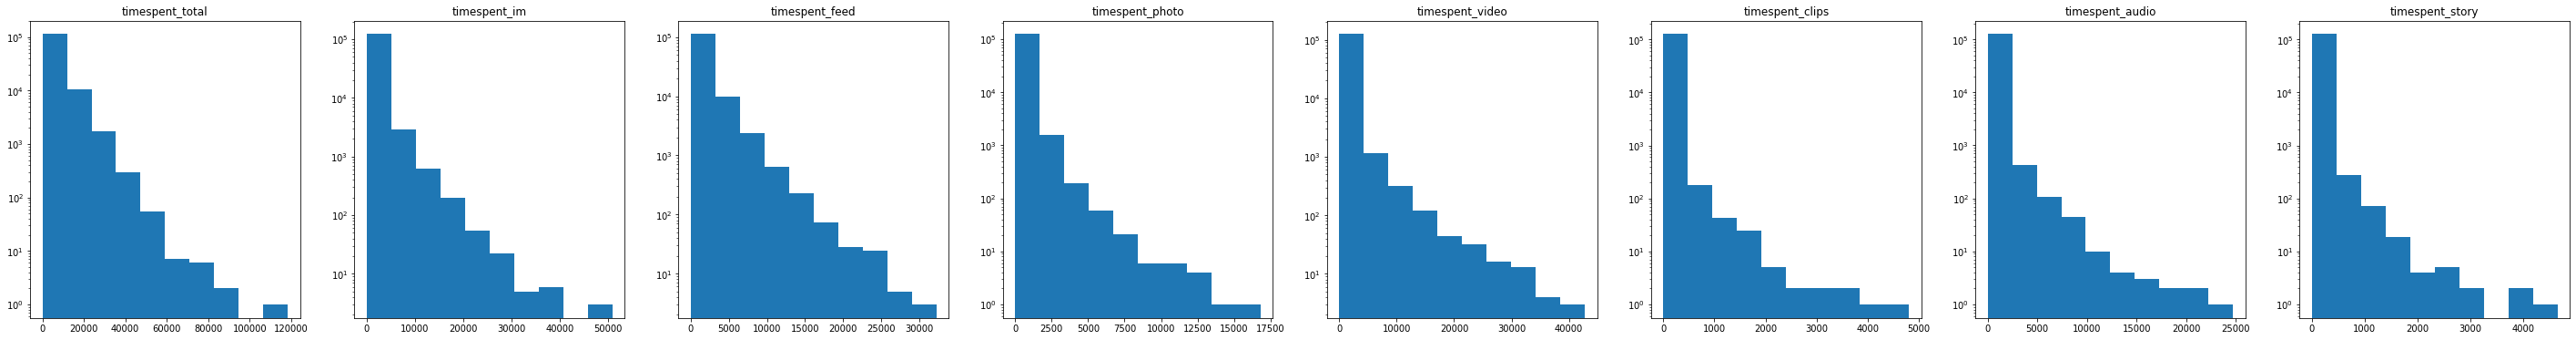

In [13]:
timespents_names = [name for name in df.columns if "timespent" in name]

fig, ax = plt.subplots(1, len(timespents_names), figsize=(50, 6))
for i, name in enumerate(timespents_names):
    timespent = df[name].values

    timespent = timespent[timespent < np.quantile(timespent, 1)]
    ax[i].hist(timespent, log=True)
    ax[i].set_title(name)
    plt.plot()

В среднем, чем больше время, проведённое в приложении/на сайте, тем меньше таких пользователей. Однако есть много людей (хотя скорее всего, это боты), которые проводят на сайте очень мнгого времени.

Интересными для количественного и качественного анализа аудитории являются параметры возраста, пола, числа друзей и подписчиков. Выделим их, а также возьмём случайые 100 людей, чтобы не загромождать графики.

/home/alex/.local/lib/python3.8/site-packages/seaborn/relational.py:644: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/alex/.local/lib/python3.8/site-packages/seaborn/relational.py:644: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/alex/.local/lib/python3.8/site-packages/seaborn/relational.py:644: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/alex/.local/lib/python3.8/site-packages/seaborn/relational.py:644: UserWarning: You passed a edgecol

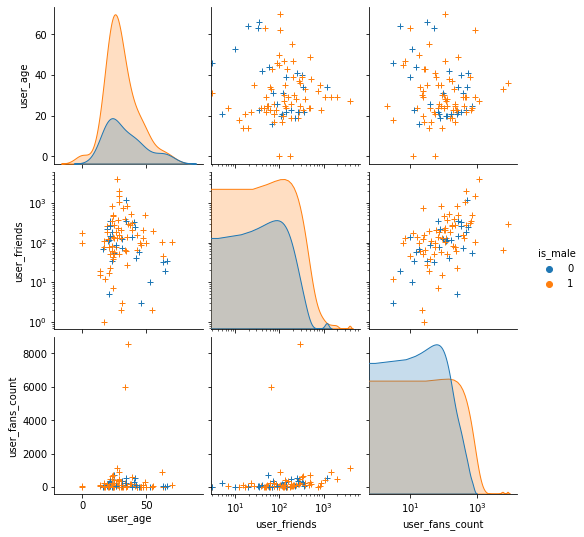

In [14]:
data = df[["user_age", "user_friends", "is_male", "user_fans_count"]].sample(100)
axes = sns.pairplot(data,  hue="is_male", plot_kws=dict(marker="+", linewidth=1)).axes
axes[1, 1].set_xscale('log')
axes[2, 2].set_xscale('log')

axes[1, 0].set_yscale('log')


Видно, что мужчин больше, чем женщин, у женщин есть пик по числу в возрасе в районе 55.

Из правой и центральной верхних картинок видно, что в старости много друзей подписчиков скорее у женщин, чем у мужчин. Также число друзей и подписчиков неплохо корррелирует.

Посмотрим, как связаны возраст, наличие apple и пол человека. 

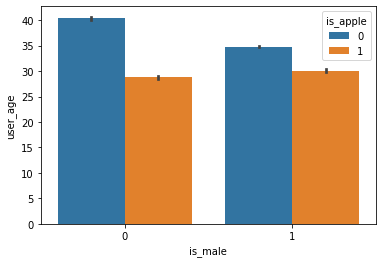

In [15]:
sns.barplot(x='is_male', y='user_age', hue='is_apple', data=df);

В среднем техникой, отличной от apple, пользуются более старые люди, как мужчины, так и женщины. Но для мужчин эта разница меньше.

Посмотрим на линейные зависимости переменных с помощью поиска корреляций. Для этого выбиерем интересные нам переменные и нарисуем матрицу корреляций.

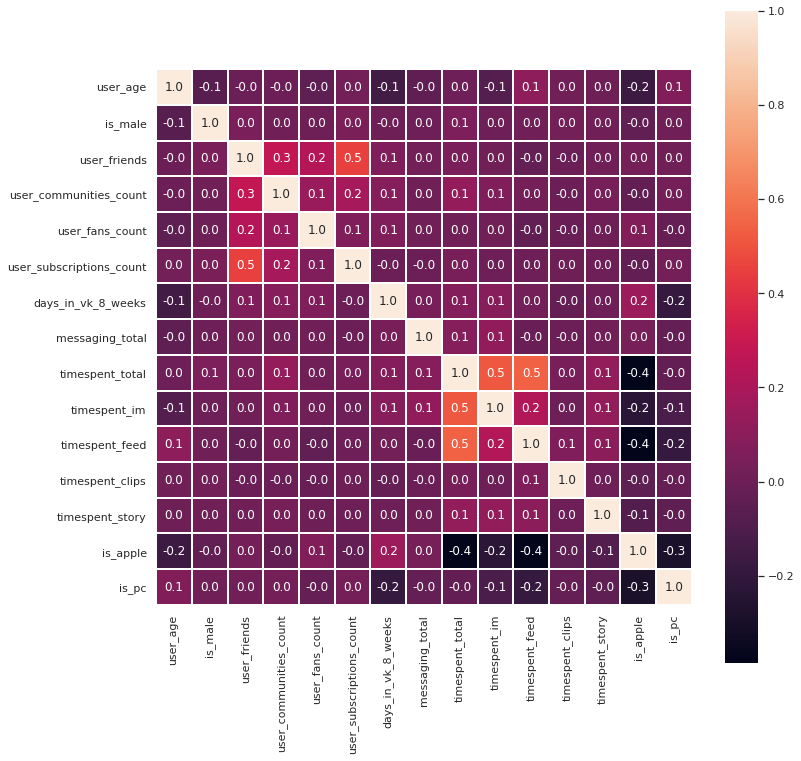

In [16]:
interesting_vars = ['user_age', 'is_male', 'user_friends',
       'user_communities_count', 'user_fans_count', 'user_subscriptions_count',
        'days_in_vk_8_weeks',
       'messaging_total',  'timespent_total', 'timespent_im',
       'timespent_feed', 
       'timespent_clips','timespent_story', 'is_apple', 'is_pc']

sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(df[interesting_vars].corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1);

Мы уже замечали, чт коррелируют число друзей и подписчиков. Также сильная положительная корреляция есть между числом друзей и сообществ (скорее всего, этим людям не важно, что добавлять, и наличие людей и сообществ, которые они не знают, их не волнует). Также сильная положительная связь есть между временем вообще и временем в ленте и в сообщениях. 

Из интересных отрицательных можно отметить число времени в приложении и наличие девайса apple, а также девайс apple с возрастом. 